<h3>1. Realice la búsqueda de un conjunto de datos de mínimo 1000 registros, donde pueda obtener información correspondiente al sector asignado y al cual se le pueda aplicar el método de RBNN.
Adjunte enlace de acceso al dataset (enlace de la página de donde obtuvo los datos)<h3/>

El dataset trata de Ventas Globales de videojuegos y fue sacados de:

https://github.com/SantiagoRtpoBdo/Taller-2---Aprendizaje-Automatico/blob/main/Video_Games.csv

<h3>2. Realice la lectura del banco de datos e imprima las categorías que tiene y cuales son las variables dependientes e independientes. <h3/>

In [86]:
import pandas as pd

df = pd.read_csv('Video_Games.csv')

df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
6821,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
6822,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
6823,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [87]:
import pandas as pd

# Imprimir las categorías (columnas) en el conjunto de datos
categorias = df.columns.tolist()
print("Categorías en el conjunto de datos:")
for categoria in categorias:
    print(categoria)

# Identificar las variables independientes y dependientes

# Variable objetivo (dependiente) en análisis de ventas y pronósticos en la industria de los videojuegos
variable_dependiente = 'Global_Sales'  # Esto dependerá de tu objetivo específico

# Variables independientes (características)
# género - plataforma - puntuaciones de la crítica - puntuaciones de los usuarios - año de lanzamiento - clasificación
variables_independientes = [col for col in categorias if col != variable_dependiente]

print("\nVariable dependiente:")
print(variable_dependiente)

print("\nVariables independientes:")
print(variables_independientes)


Categorías en el conjunto de datos:
Name
Platform
Year_of_Release
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales
Critic_Score
Critic_Count
User_Score
User_Count
Developer
Rating

Variable dependiente:
Global_Sales

Variables independientes:
['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']


<h3>3. Realice el proceso de limpieza de los datos, justificando cada una de las etapas utilizadas.<h3>


No hay datos nulos en mi conjunto de datos.

In [88]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

<h3>4. Para el caso de datos nulos o no válidos, realice el análisis de cuál es el mejor procedimiento para realizar el tratamiento de esos datos y justifique cada uno de los procedimientos utilizados.<h3/>

No es necesario, ya que no tengo nulos.

<h3>5. Realice un análisis de correlación y determine cuales de las variables del conjunto de datos tiene correlación con la variable objetivo, justifique su respuesta.<h3/>

<ipython-input-89-dc916b82317a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


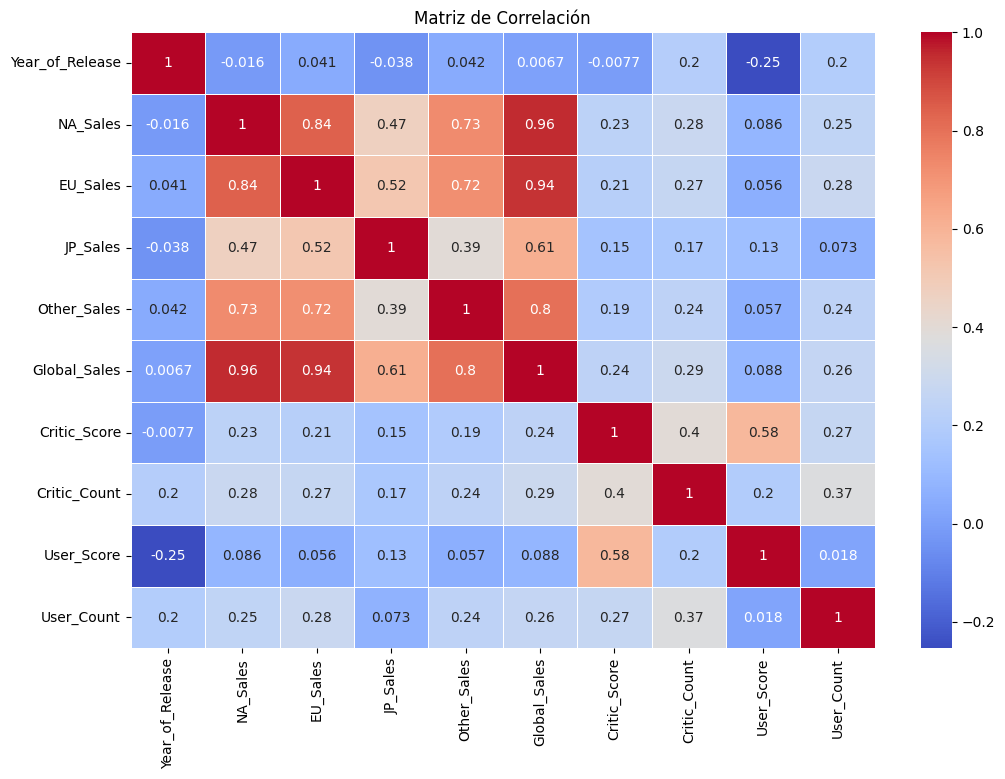

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [90]:
# Calcular la matriz de correlación entre todas las características y 'Global_Sales'
correlation_matrix = df.corr()

# Filtrar las filas de la matriz de correlación relacionadas con 'Global_Sales'
correlation_with_class = correlation_matrix['Global_Sales']

# Ordenar los valores de correlación en orden descendente
correlation_sorted = correlation_with_class.abs().sort_values(ascending=False)

# Mostrar las características con mayor correlación con 'Global_Sales'
print(correlation_sorted)

Global_Sales       1.000000
NA_Sales           0.955793
EU_Sales           0.939313
Other_Sales        0.804028
JP_Sales           0.613546
Critic_Count       0.290397
User_Count         0.264151
Critic_Score       0.237556
User_Score         0.088349
Year_of_Release    0.006661
Name: Global_Sales, dtype: float64


<ipython-input-90-f2dbce22d4ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Se ve la correlacion de las variables, las cuales alcancen el 1(100%) o mas cerca de este tienen una buena correlacion para mi variable objetivo.

<h3>7. En caso de ser necesario transforme los atributos categóricos a numéricos. Explique la elección del método utilizado para su conjunto de datos. <h3/>

Predicción de Ventas Globales: características proporcionadas, como el género, la plataforma, las puntuaciones de la crítica, las puntuaciones de los usuarios, el año de lanzamiento y la clasificación, para predecir las ventas globales de un videojuego. Esto podría ayudar a entender qué factores influyen más en las ventas globales de videojuegos.

In [91]:
df['Genre'].value_counts()

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

In [92]:
df['Platform'].value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

In [93]:
df['Rating'].value_counts()

T       2377
E       2082
M       1433
E10+     930
AO         1
K-A        1
RP         1
Name: Rating, dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder para cada columna categórica
label_encoder_genre = LabelEncoder()
label_encoder_platform = LabelEncoder()
label_encoder_rating = LabelEncoder()

# Aplicar Label Encoding a cada columna categórica y agregar las nuevas columnas al DataFrame
df['Genre_encoded'] = label_encoder_genre.fit_transform(df['Genre'])
df['Platform_encoded'] = label_encoder_platform.fit_transform(df['Platform'])
df['Rating_encoded'] = label_encoder_rating.fit_transform(df['Rating'])


In [95]:
# Calcular la matriz de correlación entre todas las características y 'Global_Sales'
correlation_matrix = df.corr()

# Filtrar las filas de la matriz de correlación relacionadas con 'Global_Sales'
correlation_with_class = correlation_matrix['Global_Sales']

# Ordenar los valores de correlación en orden descendente
correlation_sorted = correlation_with_class.abs().sort_values(ascending=False)

# Mostrar las características con mayor correlación con 'Global_Sales'
print(correlation_sorted)

Global_Sales        1.000000
NA_Sales            0.955793
EU_Sales            0.939313
Other_Sales         0.804028
JP_Sales            0.613546
Critic_Count        0.290397
User_Count          0.264151
Critic_Score        0.237556
User_Score          0.088349
Rating_encoded      0.056819
Platform_encoded    0.029000
Genre_encoded       0.010139
Year_of_Release     0.006661
Name: Global_Sales, dtype: float64


<ipython-input-95-f2dbce22d4ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<h3>6. Divida el conjunto de datos así, 80% entrenamiento y 20% pruebas.<h3/>

In [96]:
from sklearn.model_selection import train_test_split

# Supongamos que 'df' es tu DataFrame y 'Global_Sales' es tu variable objetivo
X = df[['Genre_encoded', 'Platform_encoded', 'Rating_encoded', 'Critic_Score', 'User_Score', 'Year_of_Release']]  # Características independientes
y = df['Global_Sales']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y pruebas (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 'X_train' y 'y_train' son los datos de entrenamiento (características y etiquetas)
# 'X_test' y 'y_test' son los datos de prueba (características y etiquetas)
print('Dimensiones del conjunto de entrenamiento:', X_train.shape, y_train.shape)
print('Dimensiones del conjunto de pruebas:', X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento: (5460, 6) (5460,)
Dimensiones del conjunto de pruebas: (1365, 6) (1365,)


<h3>8. Para el conjunto de datos de entrenamiento realice el escalado del conjunto (normalización o estandarización) realice la justificación del método seleccionado para su conjunto de datos. <h3/>

In [97]:
from sklearn.preprocessing import StandardScaler

# Inicializa el escalador
scaler = StandardScaler()

# Ajusta el escalador a los datos de entrenamiento y transforma los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transforma los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Ahora, X_train_scaled y X_test_scaled contienen tus características escaladas
print('Dimensiones del conjunto de entrenamiento escalado:', X_train_scaled.shape)
print('Dimensiones del conjunto de pruebas escalado:', X_test_scaled.shape)


Dimensiones del conjunto de entrenamiento escalado: (5460, 6)
Dimensiones del conjunto de pruebas escalado: (1365, 6)


<h3>9. Realice la implementación de la RBNN en su conjunto de datos, Defina la taza de aprendizaje y el error en 0.01 y 1e-7 respectivamente, justifique la técnica utilizada para definir el número de centroides <h3/>

In [98]:
from sklearn.cluster import KMeans  # Asegúrate de importar KMeans

# Supongamos que deseas probar un rango de números de centroides
num_centroids = range(2, 7)  # Prueba desde 2 hasta 20 centroides

# Inicializa una lista para almacenar los resultados de MSE
mse_results = []

for n in num_centroids:
    # Aplica K-Means con n centroides
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_train_scaled)

    # Obtiene las etiquetas de clúster para los datos de entrenamiento
    labels = kmeans.labels_

    # Calcula las distancias desde cada punto de datos al centroide más cercano
    distances = kmeans.transform(X_train_scaled)

    # Calcula el MSE como la suma de las distancias al cuadrado
    mse = (distances.min(axis=1) ** 2).mean()
    mse_results.append(mse)

# Encuentra el número óptimo de centroides basado en el punto de inflexión en la curva de MSE
optimal_num_centroids = num_centroids[mse_results.index(min(mse_results))]
print("Número óptimo de centroides:", optimal_num_centroids)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Número óptimo de centroides: 6


In [99]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Lista de funciones de activación a probar
activation_functions = ['identity', 'logistic', 'tanh', 'relu']  # Agrega las que desees probar

for activation in activation_functions:
    # Inicializa la RBNN con la función de activación actual
    rbnn = MLPRegressor(hidden_layer_sizes=(6,), activation=activation, learning_rate_init=0.01, max_iter=1000, tol=1e-7, random_state=42)

    # Entrena la RBNN
    rbnn.fit(X_train_scaled, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = rbnn.predict(X_test_scaled)

    # Calcula el Error Cuadrático Medio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Función de Activación: {activation}')
    print(f'MSE en el conjunto de prueba: {mse}\n')


Función de Activación: identity
MSE en el conjunto de prueba: 2.4130332662591987

Función de Activación: logistic
MSE en el conjunto de prueba: 1.862883360291357

Función de Activación: tanh
MSE en el conjunto de prueba: 2.0531250604909133

Función de Activación: relu
MSE en el conjunto de prueba: 2.0588242536308434



la función de activación "logistic" (función logística) obtuvo el MSE más bajo en el conjunto de pruebas, lo que indica un mejor ajuste del modelo a los datos en comparación con otras funciones de activación.

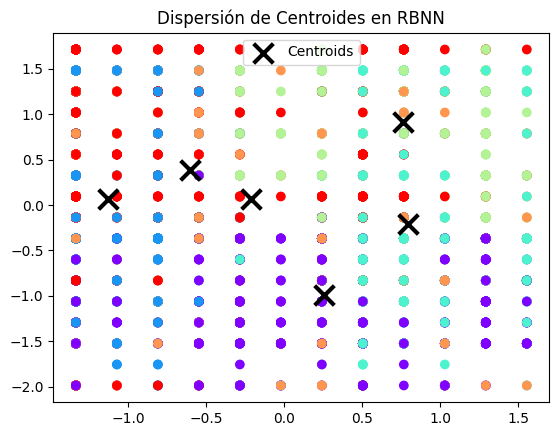

In [100]:
import matplotlib.pyplot as plt

centroids = kmeans.cluster_centers_  # Obtiene los centroides

# 'X_train_scaled' conjunto de entrenamiento escalado
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black', label='Centroids')
plt.title('Dispersión de Centroides en RBNN')
plt.legend()
plt.show()


<h3>10. Valide utilizando el método de validación cruzada por lo menos 3 topologías de la red e imprima los resultados para cada topología y justifique la elección de la topología implementada. <h3/>

In [101]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# 'X_scaled' y 'y' datos de entrenamiento escalados
X_scaled = X_train_scaled
y = y_train

# Lista de topologías de la red a probar
topologies = [(2,), (6,), (12,)]  # Se puede ajustar las capas y neuronas según la elección

for topology in topologies:
    # Inicializa la RBNN con la topología actual
    rbnn = MLPRegressor(hidden_layer_sizes=topology, activation='logistic', learning_rate_init=0.01, max_iter=1000, tol=1e-7, random_state=42)

    # Realiza la validación cruzada (por ejemplo, usando 5 divisiones)
    scores = cross_val_score(rbnn, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

    # Calcula el MSE promedio y su desviación estándar para esta topología
    mse_mean = -np.mean(scores)
    mse_std = np.std(scores)

    # Imprime los resultados
    print(f'Topología de la Red: {topology}')
    print(f'MSE promedio: {mse_mean}')
    print(f'Desviación Estándar del MSE: {mse_std}\n')


Topología de la Red: (2,)
MSE promedio: 3.7660721916757147
Desviación Estándar del MSE: 2.2991104454335765

Topología de la Red: (6,)
MSE promedio: 3.661723384099834
Desviación Estándar del MSE: 2.241708233611697

Topología de la Red: (12,)
MSE promedio: 3.673338640951396
Desviación Estándar del MSE: 2.248586087283954



En general, basándonos en los resultados de la validación cruzada, la topología (6,) parece ser una elección razonable. Proporciona un equilibrio entre la capacidad de modelado y la complejidad

<h3>11. Realice la validación con su conjunto de datos de pruebas, imprima la matriz de confusión si su ejercicio es de clasificación y explique los resultados. Si su ejercicio es de aproximación de funciones imprima el error cuadrático medio de las predicciones y explique su respuesta. <h3/>

In [102]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Inicializa el escalador
scaler = StandardScaler()

# Ajusta el escalador a los datos de entrenamiento y transforma los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transforma los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Inicializa y ajusta (entrena) tu modelo RBNN
rbnn = MLPRegressor(hidden_layer_sizes=(6,), activation='logistic', learning_rate_init=0.01, max_iter=1000, tol=1e-7, random_state=42)
rbnn.fit(X_train_scaled, y_train)

# Realiza predicciones en el conjunto de pruebas
y_pred = rbnn.predict(X_test_scaled)

# Calcula el error cuadrático medio (MSE) en el conjunto de pruebas
mse = mean_squared_error(y_test, y_pred)

# Imprime el MSE
print(f'Error Cuadrático Medio en el conjunto de pruebas: {mse}')



Error Cuadrático Medio en el conjunto de pruebas: 1.862883360291357


Están a aproximadamente 1.8629 unidades cuadradas de distancia de los valores reales de ventas globales de videojuegos en el conjunto de pruebas. Cuanto menor sea el MSE, mejor será el ajuste del modelo a los datos.